In [2]:
import pandas as pd
import numpy as np

In [3]:
def convert_time(time_str):
    """Converts time string in the format of #m#.###s to seconds"""
    min_sec = time_str.split('m')
    min_sec[1] = min_sec[1][:-1]
    return 60 * float(min_sec[0]) + float(min_sec[1])

,existing,created,real_time,user_time,sys_time,mem_used,mem_cum,real_time_noauto,user_time_noauto,sys_time_noauto,mem_used_noauto,mem_cum_noauto
0,0,20,1.616,0.354,0.443,1756,52086,2.357,0.344,0.565,8069,84819
1,500,20,1.930,0.358,0.481,16103,445500,2.969,0.406,0.585,16227,471536
2,1000,20,2.043,0.344,0.505,16214,836757,6.386,0.406,0.611,16856,864977
3,1500,20,2.109,0.340,0.496,14085,1231081,3.191,0.469,0.566,16885,1258490
4,2000,20,2.127,0.309,0.517,13858,1621297,2.927,0.428,0.669,15767,1643634
5,2500,20,2.043,0.337,0.475,15815,2006159,4.728,0.447,0.683,16832,2031171
6,3000,20,4.822,0.278,0.487,13454,2387880,8.215,0.427,0.709,15886,2404308
7,3500,20,2.628,0.293,0.451,13177,2754198,6.700,0.506,0.692,13432,2776708
8,4000,20,2.582,0.254,0.505,15243,3107829,6.384,0.449,0.737,12443,3132652
9,4500,20,2.131,0.259,0.481,16355,3416301,7.088,0.504,0.764,14916,3482174


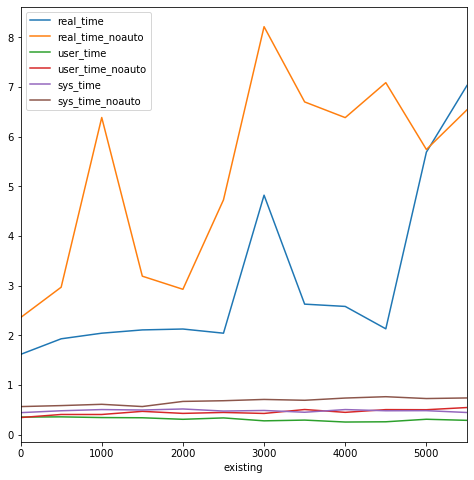

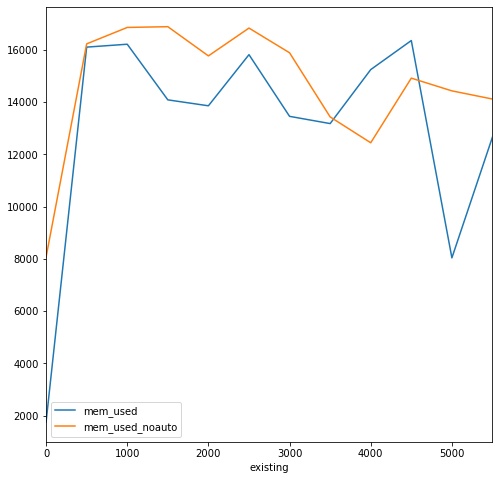

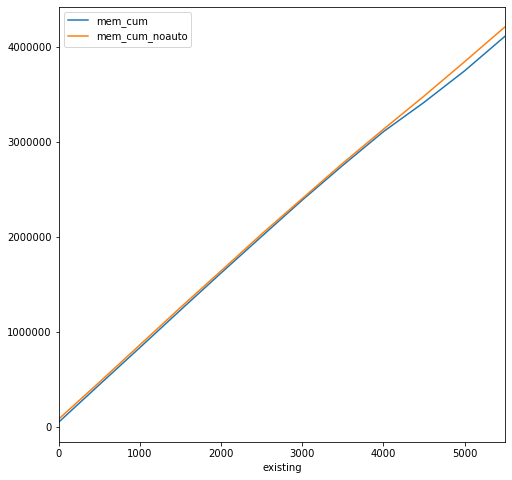

In [6]:
meas = pd.read_csv('measurements_5500_bugfix_run1.txt', delim_whitespace=True)
meas_noauto = pd.read_csv('measurements_5500_noauto_bugfix_run1.txt', delim_whitespace=True)

for col in ('real_time', 'user_time', 'sys_time'):
    meas.loc[:, col] = meas[col].map(convert_time)
    meas_noauto.loc[:, col] = meas_noauto[col].map(convert_time)
    
meas_noauto = meas_noauto.add_suffix('_noauto')
df = pd.concat([meas, meas_noauto.iloc[:, 2:]], axis=1)
display(df)

time_cols = ['real_time', 'real_time_noauto',
             'user_time', 'user_time_noauto',
             'sys_time', 'sys_time_noauto']
df.plot(x='existing', y=time_cols, figsize=(8, 8))

mem_used_cols = ['mem_used', 'mem_used_noauto']
mem_cum_cols = ['mem_cum', 'mem_cum_noauto']
df.plot(x='existing', y=mem_used_cols, figsize=(8, 8))
df.plot(x='existing', y=mem_cum_cols, figsize=(8, 8))